In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data Source: https://data.giss.nasa.gov/gistemp/
#Loading data
infile='GLBTs_dSST.txt'
dat=pd.read_csv(infile,delim_whitespace=True,header=5)
dat

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-30,-18,-11,-20,-12,-23,-21,-9,-16,-24,-20,-23,-19,***,****,-14,-18,-20,1880
1,1881,-16,-18,3,3,1,-21,-8,-4,-15,-22,-23,-12,-11,-12,-19,2,-11,-20,1881
2,1882,13,13,3,-20,-17,-27,-22,-6,-11,-26,-17,-25,-12,-11,5,-11,-18,-18,1882
3,1883,-32,-40,-14,-18,-21,-13,-9,-16,-21,-15,-23,-17,-20,-21,-32,-17,-13,-20,1883
4,1884,-16,-9,-38,-43,-37,-41,-35,-27,-28,-25,-31,-29,-30,-29,-14,-39,-35,-28,1884
5,1885,-60,-31,-26,-43,-43,-45,-36,-32,-24,-20,-20,-6,-32,-34,-40,-37,-38,-22,1885
6,1886,-43,-46,-39,-29,-27,-40,-23,-35,-26,-29,-32,-27,-33,-31,-32,-32,-32,-29,1886
7,1887,-73,-53,-35,-39,-33,-25,-24,-33,-24,-34,-25,-35,-36,-35,-51,-36,-27,-27,1887
8,1888,-38,-37,-42,-23,-23,-19,-10,-16,-10,1,1,-7,-19,-21,-37,-29,-15,-3,1888
9,1889,-12,18,7,7,-3,-14,-11,-20,-22,-23,-34,-30,-12,-10,0,4,-15,-26,1889


In [4]:
#some cleaning
dat=dat[dat['Year'].apply(lambda x: str(x).isdigit())].reset_index(drop=True)
dat['Year']=dat['Year'].astype(int)
dat

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-30,-18,-11,-20,-12,-23,-21,-9,-16,-24,-20,-23,-19,***,****,-14,-18,-20,1880
1,1881,-16,-18,3,3,1,-21,-8,-4,-15,-22,-23,-12,-11,-12,-19,2,-11,-20,1881
2,1882,13,13,3,-20,-17,-27,-22,-6,-11,-26,-17,-25,-12,-11,5,-11,-18,-18,1882
3,1883,-32,-40,-14,-18,-21,-13,-9,-16,-21,-15,-23,-17,-20,-21,-32,-17,-13,-20,1883
4,1884,-16,-9,-38,-43,-37,-41,-35,-27,-28,-25,-31,-29,-30,-29,-14,-39,-35,-28,1884
5,1885,-60,-31,-26,-43,-43,-45,-36,-32,-24,-20,-20,-6,-32,-34,-40,-37,-38,-22,1885
6,1886,-43,-46,-39,-29,-27,-40,-23,-35,-26,-29,-32,-27,-33,-31,-32,-32,-32,-29,1886
7,1887,-73,-53,-35,-39,-33,-25,-24,-33,-24,-34,-25,-35,-36,-35,-51,-36,-27,-27,1887
8,1888,-38,-37,-42,-23,-23,-19,-10,-16,-10,1,1,-7,-19,-21,-37,-29,-15,-3,1888
9,1889,-12,18,7,7,-3,-14,-11,-20,-22,-23,-34,-30,-12,-10,0,4,-15,-26,1889


In [5]:
dat=dat.set_index('Year')
dat=dat.drop(columns='Year.1',index=2018)
dat['DJF'][1880]=np.mean([-24,-20,-23])
dat['D-N'][1880]=19
dat

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-30,-18,-11,-20,-12,-23,-21,-9,-16,-24,-20,-23,-19,19,-22.3333,-14,-18,-20
1881,-16,-18,3,3,1,-21,-8,-4,-15,-22,-23,-12,-11,-12,-19,2,-11,-20
1882,13,13,3,-20,-17,-27,-22,-6,-11,-26,-17,-25,-12,-11,5,-11,-18,-18
1883,-32,-40,-14,-18,-21,-13,-9,-16,-21,-15,-23,-17,-20,-21,-32,-17,-13,-20
1884,-16,-9,-38,-43,-37,-41,-35,-27,-28,-25,-31,-29,-30,-29,-14,-39,-35,-28
1885,-60,-31,-26,-43,-43,-45,-36,-32,-24,-20,-20,-6,-32,-34,-40,-37,-38,-22
1886,-43,-46,-39,-29,-27,-40,-23,-35,-26,-29,-32,-27,-33,-31,-32,-32,-32,-29
1887,-73,-53,-35,-39,-33,-25,-24,-33,-24,-34,-25,-35,-36,-35,-51,-36,-27,-27
1888,-38,-37,-42,-23,-23,-19,-10,-16,-10,1,1,-7,-19,-21,-37,-29,-15,-3


In [6]:
dat=dat.astype(int)/100

In [7]:
print(dat['J-D'].mean())
print(dat['J-D'].median())
print((dat['J-D'].std()))
print((dat['J-D'].max()),(dat['J-D'].min()),(dat['J-D'].max())-(dat['J-D'].min()))

0.02644927536231883
-0.07500000000000001
0.3343864644796621
1.0 -0.49 1.49


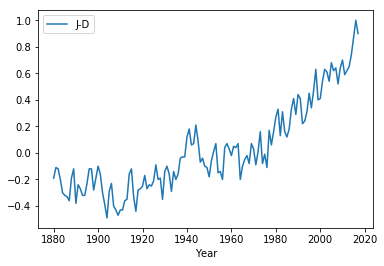

In [8]:
dat.plot(y='J-D')

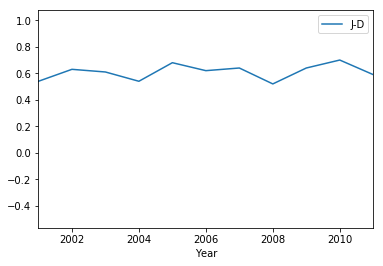

In [9]:
#"Flat" range, missleading 
dat.plot(y='J-D',xlim=[2001,2011])